<a href="https://colab.research.google.com/github/fakehaa/ML-PR/blob/main/ML%26PR_wk5_RPS_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#change directory to the folder where the images are stored on google drive
%cd /content/drive/MyDrive/MLPR - Y4T3/Datasets

/content/drive/MyDrive/MLPR - Y4T3/Datasets


In [ ]:
#check the current directory
!pwd

/content/drive/MyDrive/MLPR - Y4T3/Datasets


In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer, Conv2D,MaxPool2D
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
train_path="rps-final-dataset/train"
test_path="rps-final-dataset/test"
val_path="rps-final-dataset/val"

In [ ]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
  sub_path=train_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224, 224))
    x_train.append(img_arr)

In [ ]:
image_path

'rps-final-dataset/train/paper/9bQFlg61mt0akPoM.png'

In [ ]:
x_test=[]
for folder in os.listdir(test_path):
  sub_path=test_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224, 224))
    x_test.append(img_arr)

In [ ]:
x_val=[]
for folder in os.listdir(val_path):
  sub_path=val_path+"/"+folder
  for img in os.listdir(sub_path):
    image_path=sub_path+"/"+img
    img_arr=cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(224, 224))
    x_val.append(img_arr)

In [ ]:
# Import the NumPy module
import numpy as np
# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

##Divide for normalization

In [ ]:
#x_test, must be divided by 255.0 for normalization.
test_x=test_x/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 1401 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 266 images belonging to 3 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 350 images belonging to 3 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((1401,), (266,), (350,))

In [ ]:
labels = {value: key for key, value in
training_set.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
  print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : paper
1 : rock
2 : scissors


View some sample training images

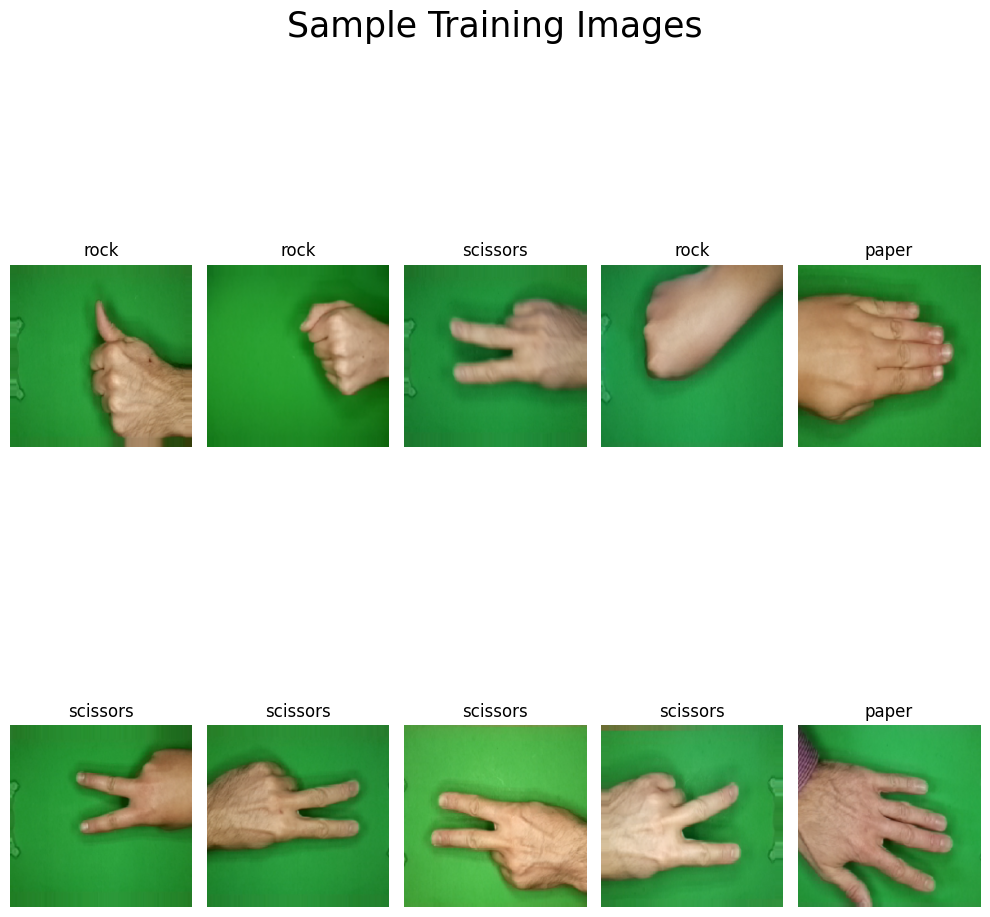

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
  for j in range(5):
    #label = labels[np.argmax(training_set[0][1][idx])]
    label = labels[training_set[0][1][idx]]
    ax[i, j].set_title(f"{label}")
    ax[i, j].imshow(training_set[0][0][idx][:, :, :])
    ax[i, j].axis("off")
    idx += 1
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()

Build the model

In [ ]:
from tensorflow.keras.applications import VGG19
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
  layer.trainable = False

80134624/80134624 [==============================] - 3s 0us/step


Customize the model - change the last layer

In [ ]:
from tensorflow.keras.layers import Flatten
x = Flatten()(vgg.output)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile( loss='sparse_categorical_crossentropy',
optimizer="adam",
metrics=['accuracy']
)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min',
verbose=1, patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
model_file = 'best_vgg_model.keras'

In [ ]:
model_check_point = ModelCheckpoint(model_file, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
# fit the model
history = model.fit(
training_set,
validation_data=val_set ,
epochs=3,
callbacks=[early_stopping_monitor, model_check_point],
batch_size=32,shuffle=True)

Epoch 1/3
44/44 [==============================] - ETA: 0s - loss: 0.6081 - accuracy: 0.7809 
Epoch 1: val_loss improved from inf to 0.15452, saving model to best_vgg_model.keras
44/44 [==============================] - 1421s 32s/step - loss: 0.6081 - accuracy: 0.7809 - val_loss: 0.1545 - val_accuracy: 0.9314
Epoch 2/3
44/44 [==============================] - ETA: 0s - loss: 0.0886 - accuracy: 0.9793 
Epoch 2: val_loss improved from 0.15452 to 0.05191, saving model to best_vgg_model.keras
44/44 [==============================] - 1402s 32s/step - loss: 0.0886 - accuracy: 0.9793 - val_loss: 0.0519 - val_accuracy: 0.9914
Epoch 3/3
44/44 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9872 
Epoch 3: val_loss improved from 0.05191 to 0.04986, saving model to best_vgg_model.keras
44/44 [==============================] - 1438s 33s/step - loss: 0.0578 - accuracy: 0.9872 - val_loss: 0.0499 - val_accuracy: 0.9857


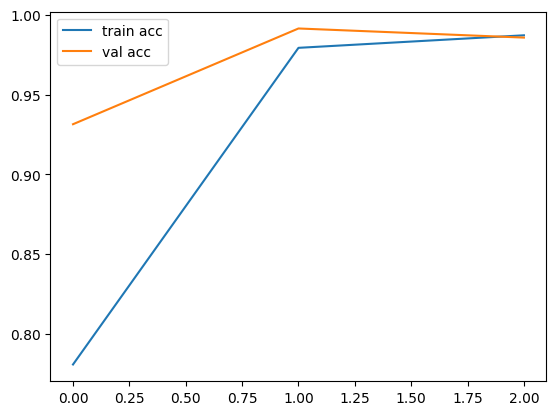

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
# Plot the accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

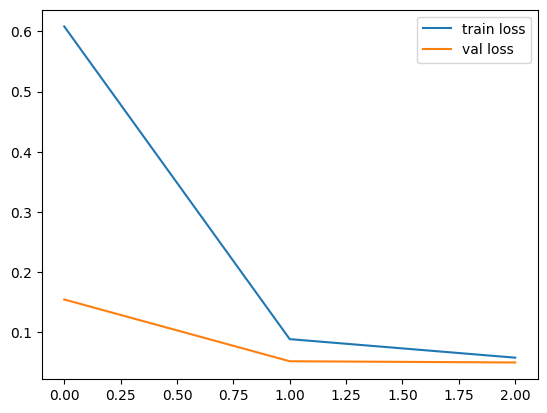

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/MLPR - Y4T3/Datasets/best_vgg_model.keras')

In [ ]:
# Evaluate the model on the test data
model.evaluate(test_set, batch_size=32)

9/9 [==============================] - 208s 23s/step - loss: 0.0589 - accuracy: 0.9925


[0.05893521383404732, 0.9924812316894531]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

#get classification report
print(classification_report(y_pred, test_y))

#get confusion matrix
print(confusion_matrix(y_pred,test_y))

9/9 [==============================] - 207s 23s/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       1.00      0.99      0.99       147

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266

[[119   0]
 [  2 145]]


In [ ]:
predictions = model.predict(test_x)

9/9 [==============================] - 207s 23s/step


In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 20))
idx = 10
for i in range(2):
  for j in range(6):
    predicted_label = labels[np.argmax(predictions[idx])]
    ax[i, j].set_title(f"{predicted_label}")
    ax[i, j].imshow(test_x[idx])
    ax[i, j].axis("off")
    idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()